# 3D mouse example

In [1]:
import sys
import watershed3d
from skimage.morphology import watershed
import matplotlib as mpl
from skimage.measure import regionprops
import pandas as pd
import tifffile as tiff
from matplotlib.pylab import imshow, plot, subplots, hist, scatter, bar, step, figure, subplot, colorbar, tight_layout
from skimage.filters import threshold_otsu

load file 

In [2]:
# filename = '/Users/jakob/Documents/RU/Data/mouse_example/C1-Brachy_568_FoxA2_488_Cdx2_647_500um_2_filtered.tif'
filename = '/Users/jakob/Documents/RU/Data/mouse_example/C1-E14EpiLC ONrest Brachy 568 Sox2 647 Hoechst Lamin 488 500um 2.tif'
w = watershed3d.Ws3d(filename)

image is three-dimensional
found probability map /Users/jakob/Documents/RU/Data/mouse_example/C1-E14EpiLC ONrest Brachy 568 Sox2 647 Hoechst Lamin 488 500um 2_Probabilities.h5


check histogram of image data

In [3]:
# w.intensity_histogram()

load Ilastik probability mask and plot it

In [6]:
w.load_mask(prob=0.5)
# w.plot_probability_map()

shape (28, 968, 971) (28, 968, 971)
loaded probability map


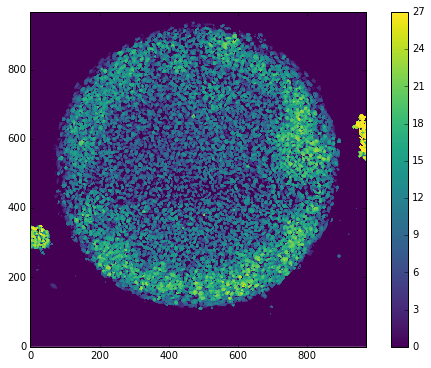

In [7]:
w.z_heat_map();

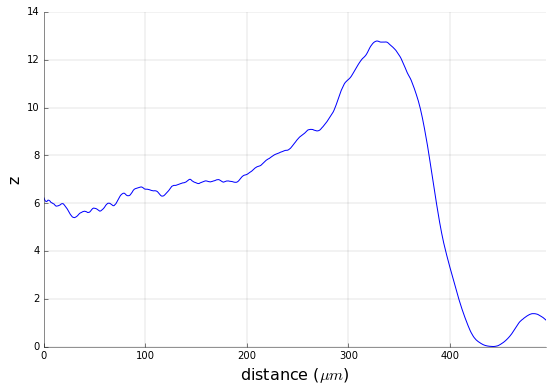

In [8]:
r,z= w.radial_z_height()

do segmentation without the object classifier

In [11]:
w.segment(sigma=(1,3,3), min_distance=2, remove_small_nuclei=True, compactness=0.05)

segmentation done, found 2844 cells


show segmentation

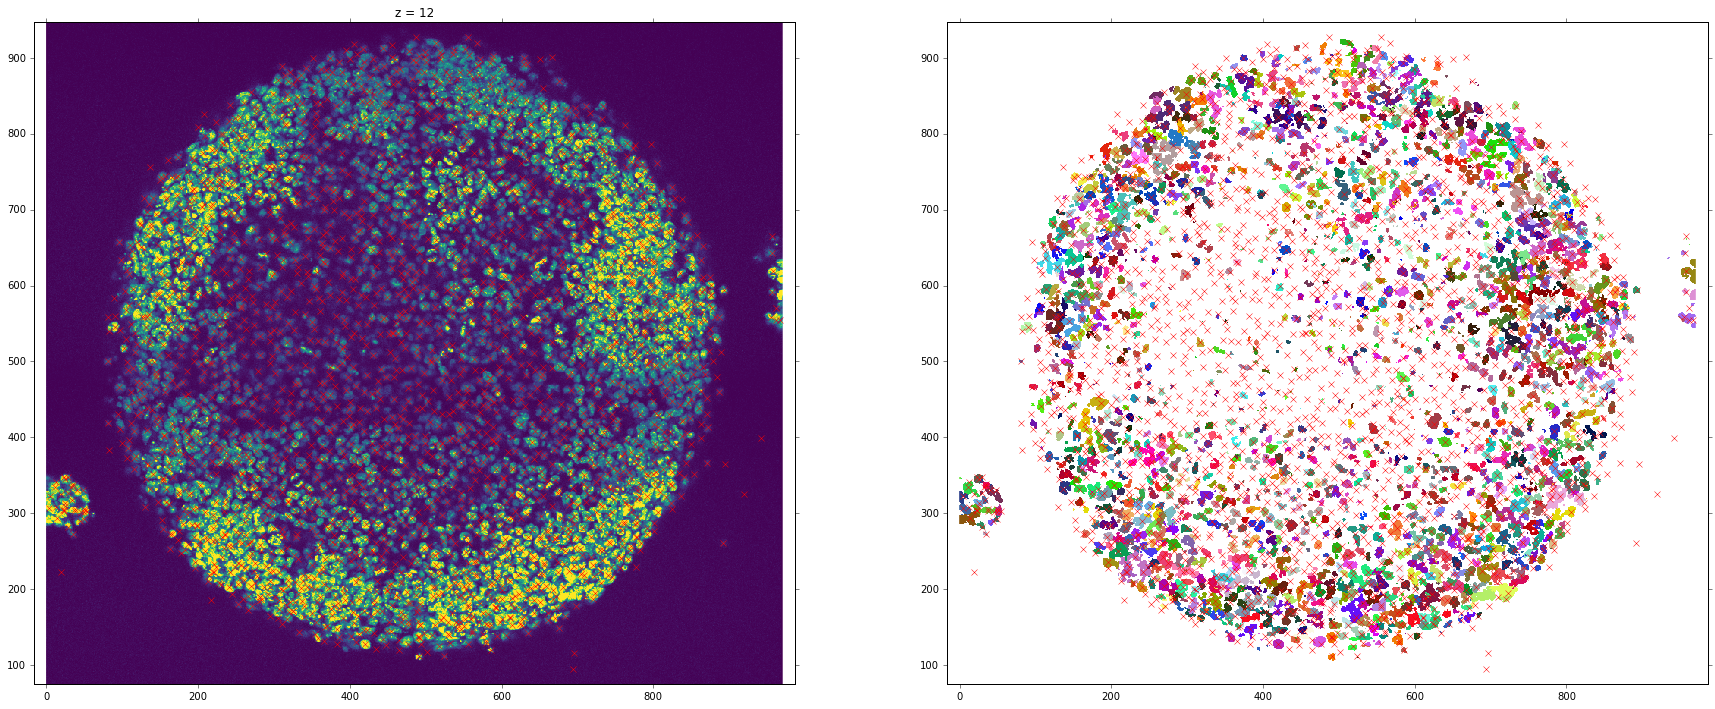

In [12]:
w.show_segmentation(z=12,figsize=(30,20))

In [9]:
w.df.head()

,area,total_intensity,mean_intensity,centroid
cell_id,,,,
1,801,491237.0,613.279650,"[2.04619225968, 121.634207241, 435.324594257]"
2,48,46715.0,973.229167,"[1.54166666667, 161.708333333, 306.0625]"
3,1,885.0,885.000000,"[2.0, 164.0, 428.0]"
4,253,244352.0,965.818182,"[2.35968379447, 172.505928854, 372.490118577]"
5,1,671.0,671.000000,"[2.0, 183.0, 475.0]"


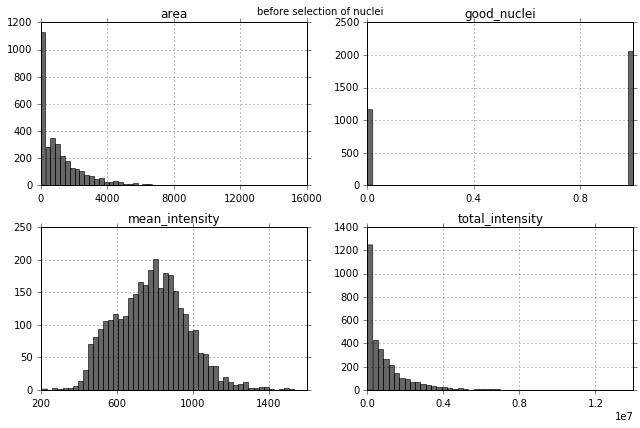

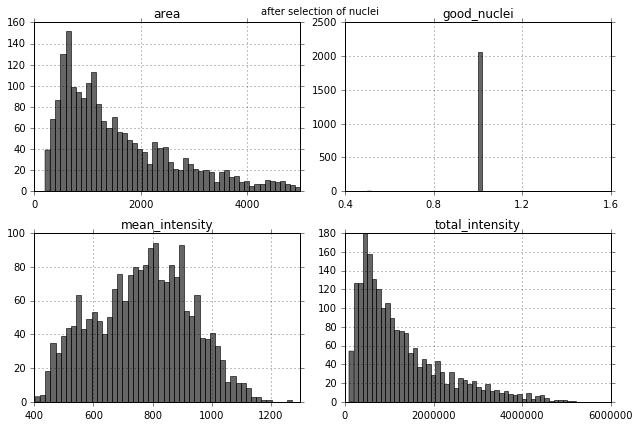

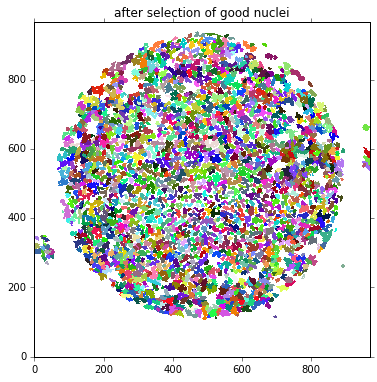

In [10]:
w.select_nuclei(quantiles=[0.2,0.85], cutoff=[200,5000], plot=1)

apply to other channels

In [11]:
# filename_bra = '/Users/jakob/Documents/RU/Data/mouse_example/C3-Brachy_568_FoxA2_488_Cdx2_647_500um_2.tif'
# filename_foxa2 = '/Users/jakob/Documents/RU/Data/mouse_example/C4-Brachy_568_FoxA2_488_Cdx2_647_500um_2.tif'
filename_cdx2 = '/Users/jakob/Documents/RU/Data/mouse_example/C5-Brachy_568_FoxA2_488_Cdx2_647_500um_2.tif'
filename_sox2 = '/Users/jakob/Documents/RU/Data/mouse_example/C4-E14EpiLC ONrest Brachy 568 Sox2 647 Hoechst Lamin 488 500um 2.tif'
filename_bra = '/Users/jakob/Documents/RU/Data/mouse_example/C5-E14EpiLC ONrest Brachy 568 Sox2 647 Hoechst Lamin 488 500um 2.tif'

In [12]:
w.apply_to_channels(filename_bra, 'bra')
w.apply_to_channels(filename_sox2, 'sox2')
# w.apply_to_channels(filename_foxa2, 'foxa2')
# w.apply_to_channels(filename_cdx2, 'cdx2')

In [13]:
w.df.head()
# w.good_nuclei.head()

,area,total_intensity,mean_intensity,centroid,good_nuclei,bra,sox2
cell_id,,,,,,,
1,801,491237.0,613.279650,"[2.04619225968, 121.634207241, 435.324594257]",True,69362.0,137854.0
2,48,46715.0,973.229167,"[1.54166666667, 161.708333333, 306.0625]",False,11868.0,8098.0
3,1,885.0,885.000000,"[2.0, 164.0, 428.0]",False,151.0,148.0
4,253,244352.0,965.818182,"[2.35968379447, 172.505928854, 372.490118577]",True,18889.0,39906.0
5,1,671.0,671.000000,"[2.0, 183.0, 475.0]",False,80.0,189.0


# analysis

696 1


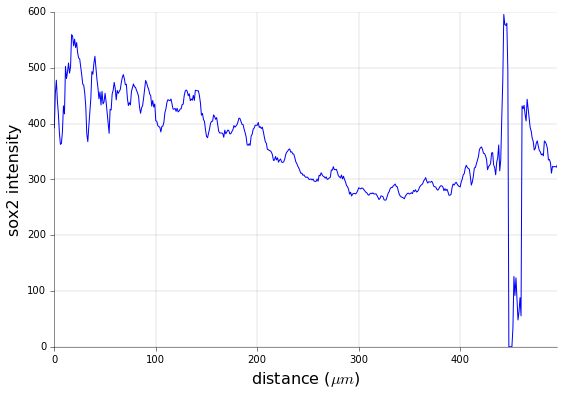

In [15]:
watershed3d.radial_intensity(w, 'sox2');

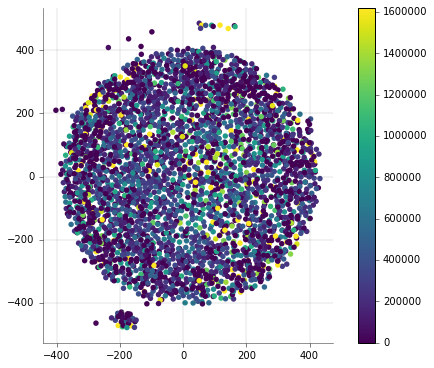

In [16]:
watershed3d.dot_plot([w], 'sox2', colormap_cutoff=0.4)

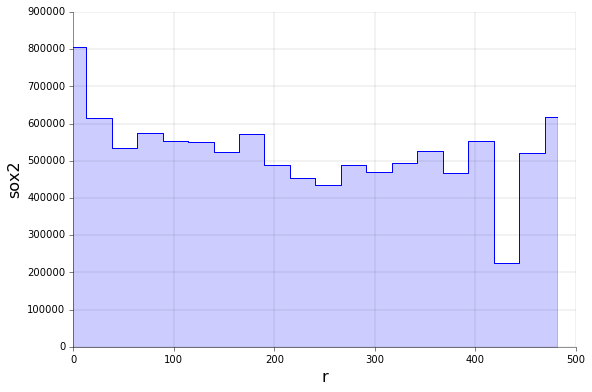

In [18]:
watershed3d.radial_profile_per_cell(w, 'sox2', nbins=20, only_selected_cells=1);

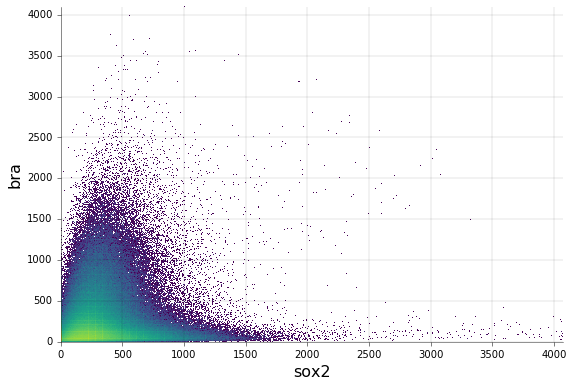

In [25]:
# watershed3d.coexpression_per_cell(w, 'sox2', 'bra')
watershed3d.coexpression_per_pixel(w, 'sox2', 'bra', downsample=1, bins=1000)

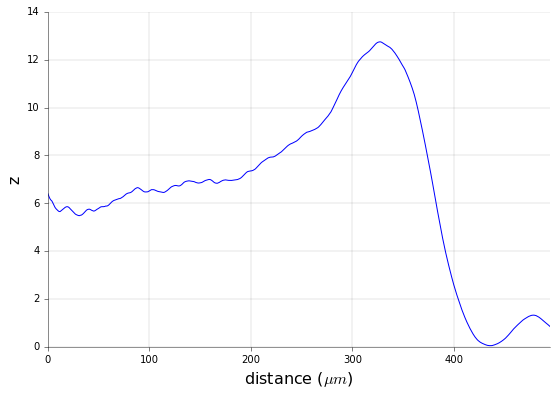

In [22]:
watershed3d.radial_z_height([w,w], binsize=30);

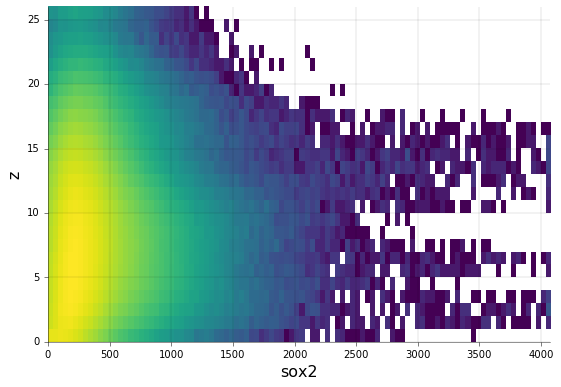

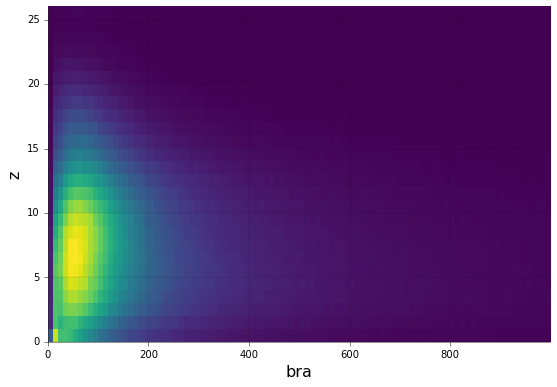

In [23]:
watershed3d.scatter_expression_z(w, 'sox2', lognorm=True, bins=100)
watershed3d.scatter_expression_z(w, 'bra', bins=100, expression_max=1000)

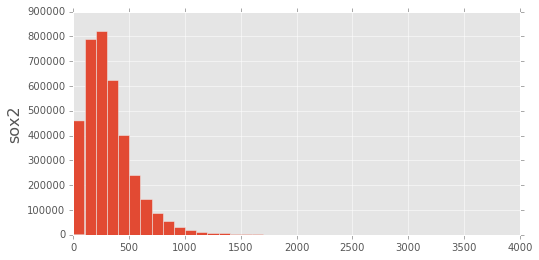

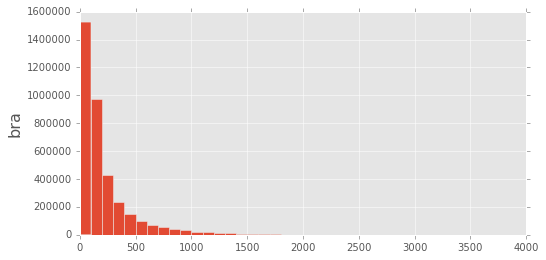

In [24]:
reload(watershed3d)
watershed3d.expression_histogram(w, 'sox2', bins=100, log=False)
watershed3d.expression_histogram(w, 'bra', bins=100, log=False)

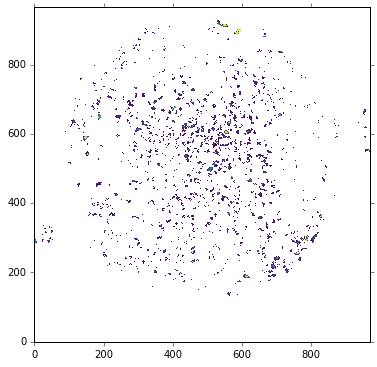

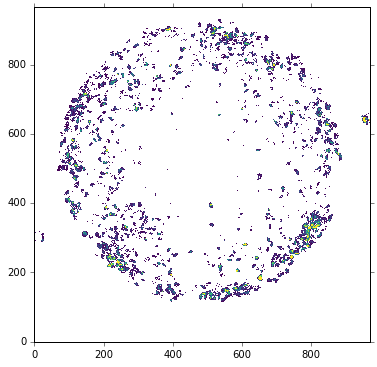

In [26]:
reload(watershed3d)
watershed3d.expression_map(w, 'sox2', 1000, colormap_cutoff=.2)
watershed3d.expression_map(w, 'bra', 800, colormap_cutoff=.2)

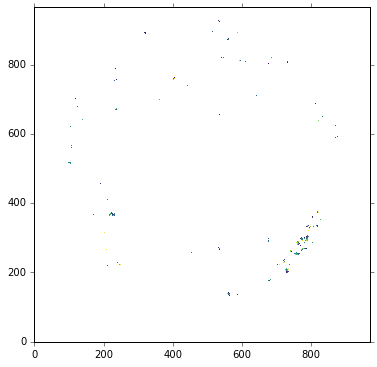

In [31]:
watershed3d.co_expression_map(w, 'sox2', 'bra', 1000, 800, colormap_cutoff=.5)